# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ndata = pd.read_excel('/content/drive/MyDrive/Atlanta/Week 6 Training/Week 6 Project/Data/Twitter/Nike.xlsx')

In [ ]:
ndata.shape

(16977, 4)

In [ ]:
ndata.head()

,Unnamed: 0,created_at,id,text
0,0,2021-08-29T23:34:23.000Z,1.432120e+18,@therecount @BioAnnie2 This picture is Amazing...
1,1,2021-08-29T23:07:16.000Z,1.432120e+18,"bought a gift for northie, all she want is nik..."
2,2,2021-08-29T23:05:06.000Z,1.432120e+18,"Sizes Added: Nike Air Force 1 Cork ""Happy Pine..."
3,3,2021-08-29T23:05:04.000Z,1.432120e+18,@KeeganHall @Jumpman23 @Nike @nikebasketball @...
4,4,2021-08-29T22:47:04.000Z,1.432110e+18,@hamlyn_chris Itâ€™s tough to say really until...


# Table Format Pre-Processing

In [ ]:
# Deleting the first two columns as we don't require them

ndata.drop(ndata.columns[[0,2]], axis=1, inplace=True)

In [ ]:
# Checking the Unique values in the data as there are multiples retweets for same tweet

ndata.nunique()

created_at    1751
text          1736
dtype: int64

In [ ]:
# Dropping the duplicate tweets from the dataframe
ndata = ndata.drop_duplicates()

In [ ]:
ndata.shape

(1762, 2)

In [ ]:
ndata.head()

,created_at,text
0,2021-08-29T23:34:23.000Z,@therecount @BioAnnie2 This picture is Amazing...
1,2021-08-29T23:07:16.000Z,"bought a gift for northie, all she want is nik..."
2,2021-08-29T23:05:06.000Z,"Sizes Added: Nike Air Force 1 Cork ""Happy Pine..."
3,2021-08-29T23:05:04.000Z,@KeeganHall @Jumpman23 @Nike @nikebasketball @...
4,2021-08-29T22:47:04.000Z,@hamlyn_chris Itâ€™s tough to say really until...


In [ ]:
#  Seperating the Date and Time into two different columns

ndata['Date'] = pd.to_datetime(ndata['created_at']).dt.date
ndata['Time'] = pd.to_datetime(ndata['created_at']).dt.time

#  Dropping the created_at Columns as its not required anymore
ndata.drop(ndata.columns[0], axis=1, inplace=True)

# Resetting the index and the putting the columns names
ndata.reset_index(level = 0, inplace=True)
ndata.columns = ['Post_id','Post', 'Date', 'Time']


In [ ]:
ndata.head()

,Post_id,Post,Date,Time
0,0,@therecount @BioAnnie2 This picture is Amazing...,2021-08-29,23:34:23
1,1,"bought a gift for northie, all she want is nik...",2021-08-29,23:07:16
2,2,"Sizes Added: Nike Air Force 1 Cork ""Happy Pine...",2021-08-29,23:05:06
3,3,@KeeganHall @Jumpman23 @Nike @nikebasketball @...,2021-08-29,23:05:04
4,4,@hamlyn_chris Itâ€™s tough to say really until...,2021-08-29,22:47:04


In [ ]:
ndata.value_counts(subset='Date')

Date
2021-08-31    529
2021-08-30    403
2021-09-03    384
2021-09-02    225
2021-08-29    204
2021-09-01     16
dtype: int64

In [ ]:
ndata.dtypes

Post_id     int64
Post       object
Date       object
Time       object
dtype: object

In [ ]:
# Converting the Post to string type for our analysis

ndata.Post = ndata.Post.astype(str)

# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


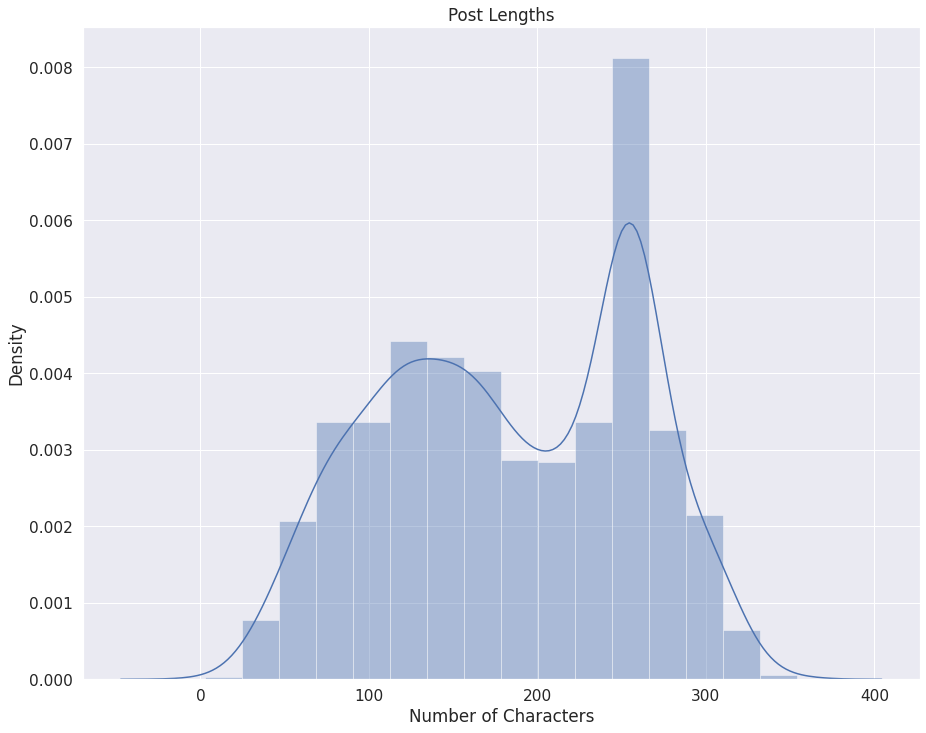

In [ ]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1.4)
sns.distplot([len(post) for post in ndata['Post']], bins='auto')
plt.title("Post Lengths")
plt.xlabel('Number of Characters')
plt.show();

# Text Pre-Processing

### Preprocess the Post Column

In [ ]:
#Preprocess the Post from each tweet ( cleaning the text)

import re

def preprocess_text(sentence):
    #removal of HTTP links/URLs mixed up in any text
    sentence = re.sub('http://\S+|https://\S+', '', str(sentence))
    
    #removal of any references outside the text
    sentence = re.sub("[\(\[].*?[\)\]]", "", str(sentence))
    
    #removal of newline characters
    sentence = re.sub('\n',' ',str(sentence))
    sentence = re.sub('\n','',str(sentence))
    
    #removal of apostrophers
    sentence = re.sub("'s",'',str(sentence))
    
    #removal of numbers in pargraphs
    sentence = re.sub('[0-9]+.\t','',str(sentence))
    
    #removal of hyphens in any sentences
    sentence = re.sub("-",' ',str(sentence))
    sentence = re.sub("— ",'',str(sentence))
    
    #removal of salutations in the sentences
    sentence = re.sub("Mr\.",'Mr',str(sentence))
    sentence = re.sub("Mrs\.",'Mrs',str(sentence))
    
    #removal of quation marks in the sentences
    sentence = re.sub('\"','',str(sentence))
    
    return sentence

ndata['Post'] = ndata["Post"].apply(preprocess_text)
ndata.head()

,Post_id,Post,Date,Time
0,0,@therecount @BioAnnie2 This picture is Amazing...,2021-08-29,23:34:23
1,1,"bought a gift for northie, all she want is nik...",2021-08-29,23:07:16
2,2,Sizes Added: Nike Air Force 1 Cork Happy Pinea...,2021-08-29,23:05:06
3,3,@KeeganHall @Jumpman23 @Nike @nikebasketball @...,2021-08-29,23:05:04
4,4,@hamlyn_chris Itâ€™s tough to say really until...,2021-08-29,22:47:04


### De-contract Words

In [ ]:
!pip install contractions
import contractions

     |████████████████████████████████| 321 kB 31.8 MB/s 
     |████████████████████████████████| 284 kB 56.8 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85436 sha256=b49dc712d0f86caef29609573eb348351f8c3ccd47ec274fec0ff45e7d29e4d7
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
def replace_contractions(text):
  return contractions.fix(text)

In [ ]:
ndata1 = ndata.copy()

In [ ]:
for i, post in enumerate(ndata['Post']):
  ndata1['Post'][i] = replace_contractions(post)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ndata1.head()

,Post_id,Post,Date,Time
0,0,@therecount @BioAnnie2 This picture is Amazing...,2021-08-29,23:34:23
1,1,"bought a gift for northie, all she want is nik...",2021-08-29,23:07:16
2,2,Sizes Added: Nike Air Force 1 Cork Happy Pinea...,2021-08-29,23:05:06
3,3,@KeeganHall @Jumpman23 @Nike @nikebasketball @...,2021-08-29,23:05:04
4,4,@hamlyn_chris Itâ€™s tough to say really until...,2021-08-29,22:47:04


### Remove Numericals

In [ ]:
import re

def remove_numbers(post):
  post = re.sub(r'\d+', '', post)
  return post

In [ ]:
ndata1['Post'] = ndata1['Post'].apply(lambda x: remove_numbers(x))

### Tokenization

In [ ]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer = ToktokTokenizer()

for i, post in enumerate(ndata['Post']):
  ndata1['Post'][i] = tokenizer.tokenize(post)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
ndata1.head()

,Post_id,Post,Date,Time
0,0,"[@therecount, @BioAnnie2, This, picture, is, A...",2021-08-29,23:34:23
1,1,"[bought, a, gift, for, northie, ,, all, she, w...",2021-08-29,23:07:16
2,2,"[Sizes, Added, :, Nike, Air, Force, 1, Cork, H...",2021-08-29,23:05:06
3,3,"[@KeeganHall, @Jumpman23, @Nike, @nikebasketba...",2021-08-29,23:05:04
4,4,"[@hamlyn_chris, Itâ€, ™s, tough, to, say, real...",2021-08-29,22:47:04


### Non-Ascii Characters

In [ ]:
import unicodedata

def remove_non_ascii(words):
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words

In [ ]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: remove_non_ascii(post))

In [ ]:
ndata1['Post'][0]

['@therecount',
 '@BioAnnie2',
 'This',
 'picture',
 'is',
 'Amazing',
 'Every',
 'detail',
 'tells',
 'a',
 'story',
 ',',
 'bare',
 'feet',
 ',',
 'knock',
 'off',
 'Nike',
 'shirt',
 ',',
 'traditional',
 'dress',
 ',',
 'patches',
 'on',
 'jeans',
 ',',
 'snacks',
 ',',
 'the',
 'peace',
 'sign',
 '...',
 'AWESOME',
 'new',
 'Americans',
 'Welcome']

### Punctuation

In [ ]:
def remove_punctuation(words):
  new_words = []
  for word in words:
    new_word = re.sub(r'[^\w\s]', '', word)
    if new_word != '':
      new_words.append(new_word)
  return new_words

In [ ]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: remove_punctuation(post))

In [ ]:
ndata1['Post'][0]

['therecount',
 'BioAnnie2',
 'This',
 'picture',
 'is',
 'Amazing',
 'Every',
 'detail',
 'tells',
 'a',
 'story',
 'bare',
 'feet',
 'knock',
 'off',
 'Nike',
 'shirt',
 'traditional',
 'dress',
 'patches',
 'on',
 'jeans',
 'snacks',
 'the',
 'peace',
 'sign',
 'AWESOME',
 'new',
 'Americans',
 'Welcome']

### Lower Case

In [ ]:
def lower_case(words):
  new_words = []
  for word in words:
    new_word = word.lower()
    new_words.append(new_word)
  return new_words

In [ ]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: lower_case(post))

In [ ]:
ndata1.head()

,Post_id,Post,Date,Time
0,0,"[therecount, bioannie2, this, picture, is, ama...",2021-08-29,23:34:23
1,1,"[bought, a, gift, for, northie, all, she, want...",2021-08-29,23:07:16
2,2,"[sizes, added, nike, air, force, 1, cork, happ...",2021-08-29,23:05:06
3,3,"[keeganhall, jumpman23, nike, nikebasketball, ...",2021-08-29,23:05:04
4,4,"[hamlyn_chris, ita, tms, tough, to, say, reall...",2021-08-29,22:47:04


### Stop Words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# We don't want to remove certain words like 'no' or 'not', so we take it out of the stopwords list
removed_stopwords = ['before', 'after', 'above', 'below', 'down', 'in', 'out', 'again', 'further','when', 'where', 'why', "mustn't", 'shouldn', "shouldn't", 'wasn', "wasn't", "weren't" "won't", 'wouldn', "wouldn't"]

# Lets create a function to remove the desired stopwords from stopword list

def Diff(li1, li2):
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2]
    return li_dif


In [ ]:
# lets call the function Diff to remove the desire words from stopwords list

stopwords = Diff(stopwords, removed_stopwords)

In [ ]:
def remove_stopwords(words):
  new_words = []
  for word in words:
    if word not in stopwords:
      new_words.append(word)
  return new_words

In [ ]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: remove_stopwords(post))

In [ ]:
ndata1['Post']

0       [therecount, bioannie2, picture, amazing, ever...
1                     [bought, gift, northie, want, nike]
2       [sizes, added, nike, air, force, 1, cork, happ...
3       [keeganhall, jumpman23, nike, nikebasketball, ...
4       [hamlyn_chris, ita, tms, tough, say, really, t...
                              ...                        
1757    [dareturns, essjayy2345, directing, energy, pe...
1758    [green, glowcoconut, milk, happy, pineapple, n...
1759    [dona, tmt, forget, also, name, also, brand, w...
1760    [bindelj, blablafishcakes, prey, worst, abuses...
1761    [dmac_la, thought, nike, clown, pajamas, home,...
Name: Post, Length: 1762, dtype: object

### Special Characters

In [ ]:
def remove_special_characters(words):
  pattern = r'[^a-zA-z\s]'
  new_words = []
  for word in words:
    new_word = re.sub(pattern, '', word)
    new_words.append(new_word)
  return new_words

In [ ]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: remove_special_characters(post))

### Remove Blank Words

In [ ]:
def remove_blanks(words):
  new_words = []
  for word in words:
    if word != '':
      new_words.append(word)
  return new_words

In [ ]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: remove_blanks(post))

In [ ]:
ndata['Post'][4]

'@hamlyn_chris Itâ€™s tough to say really until you test them. Problem with carbon plated  shoes is they effect people differently. My guess is Nike and more narrow shoes would make your problem more severe. A wider base shoe like Brooks or new balance may'

In [ ]:
ndata1['Post'][4]

['hamlyn_chris',
 'ita',
 'tms',
 'tough',
 'say',
 'really',
 'test',
 'problem',
 'carbon',
 'plated',
 'shoes',
 'effect',
 'people',
 'differently',
 'guess',
 'nike',
 'narrow',
 'shoes',
 'would',
 'make',
 'problem',
 'severe',
 'wider',
 'base',
 'shoe',
 'like',
 'brooks',
 'new',
 'balance',
 'may']

In [ ]:
ndata['Post'][28]

'@CouetteElla @Nike Just amazing baby  â\x9d¤'

In [ ]:
ndata1['Post'][28]

['couetteella', 'nike', 'amazing', 'baby']

### Lemmatize

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
  
lemmatizer = WordNetLemmatizer()
  
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
rocks : rock
corpora : corpus


In [ ]:
def lemmatize_words(words):
  new_words = []
  for word in words:
    new_word = lemmatizer.lemmatize(word)
    new_words.append(new_word)
  return new_words

In [ ]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: lemmatize_words(post))

In [ ]:
ndata['Post'][45]

'@Nike happy Sunday from your favorite loser '

In [ ]:
ndata1['Post'][45]

['nike', 'happy', 'sunday', 'favorite', 'loser']

# Exploration of Pre-Processed Corpus

In [ ]:
from collections import Counter

top = Counter([item for sublist in ndata1['Post'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','Count']
freq.style.background_gradient(cmap='Reds')

,Common_words,Count
0,nike,1807
1,sale,443
2,in,385
3,gt,283
4,tm,261
5,like,216
6,amazing,202
7,shoe,198
8,air,194
9,out,193


# Sentiment Analysis

### Simple Sentiment Evaluation using TextBlob

In [ ]:
ndata2 = ndata1.copy()

In [ ]:
from textblob import TextBlob
text = TextBlob("In 1939 the war started")
print(text.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [ ]:
text = TextBlob("I am very happy")
print(text.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)


In [ ]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
# Call function to get the Sentiments

# Converting the Post to string type for our analysis

ndata1.Post = ndata1.Post.astype(str)

ndata1['Sentiment'] = ndata1['Post'].apply(lambda post: analyze_sentiment(post))

ndata1.head(5)

,Post_id,Post,Date,Time,Sentiment
0,0,"['therecount', 'bioannie', 'picture', 'amazing...",2021-08-29,23:34:23,Positive
1,1,"['bought', 'gift', 'northie', 'want', 'nike']",2021-08-29,23:07:16,Neutral
2,2,"['size', 'added', 'nike', 'air', 'force', 'cor...",2021-08-29,23:05:06,Positive
3,3,"['keeganhall', 'jumpman', 'nike', 'nikebasketb...",2021-08-29,23:05:04,Positive
4,4,"['hamlyn_chris', 'ita', 'tm', 'tough', 'say', ...",2021-08-29,22:47:04,Negative


In [ ]:
# Overall Summary

print("Total Positive Tweets are : {}".format(len(ndata1[ndata1["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(ndata1[ndata1["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(ndata1[ndata1["Sentiment"]=="Neutral"])))

Total Positive Tweets are : 1132
Total Negative Tweets are : 246
Total Neutral Tweets are : 384


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Sentiments for Nike')

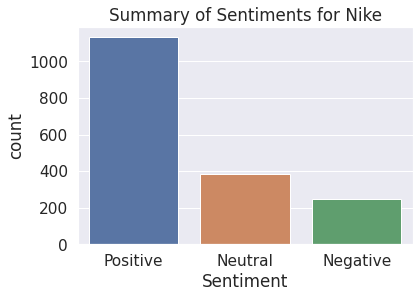

In [ ]:
sns.countplot(ndata1["Sentiment"])
plt.title("Summary of Sentiments for Nike")

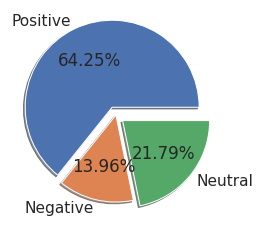

In [ ]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(ndata1[ndata1["Sentiment"]=="Positive"])
b=len(ndata1[ndata1["Sentiment"]=="Negative"])
c=len(ndata1[ndata1["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

### Vader Sentiment

Vader is specifically designed for social media text, so let's use it.

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
text = SentimentIntensityAnalyzer()
score = text.polarity_scores("I am happy")
print(score)

     |████████████████████████████████| 125 kB 34.4 MB/s 
{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}


In [ ]:
score = text.polarity_scores("I just got a call from my boss - does he realise it's Saturday? smh :(")
print(score)

{'neg': 0.271, 'neu': 0.729, 'pos': 0.0, 'compound': -0.6369}


In [ ]:
vader_neg = []
vader_neu = []
vader_pos = []
vader_com = []

for post in ndata['Post']:
  scores = text.polarity_scores(post)
  vader_neg.append(scores['neg'])
  vader_neu.append(scores['neu'])
  vader_pos.append(scores['pos'])
  vader_com.append(scores['compound'])

In [ ]:
ndata3 = ndata2.copy()

ndata3['Negative'] = vader_neg
ndata3['Neutral'] = vader_neu
ndata3['Positive'] = vader_pos
ndata3['Compound'] = vader_com

ndata3.head()

,Post_id,Post,Date,Time,Negative,Neutral,Positive,Compound
0,0,"[therecount, bioannie, picture, amazing, every...",2021-08-29,23:34:23,0.000,0.716,0.284,0.8834
1,1,"[bought, gift, northie, want, nike]",2021-08-29,23:07:16,0.000,0.756,0.244,0.4939
2,2,"[size, added, nike, air, force, cork, happy, p...",2021-08-29,23:05:06,0.000,0.778,0.222,0.5719
3,3,"[keeganhall, jumpman, nike, nikebasketball, es...",2021-08-29,23:05:04,0.000,0.689,0.311,0.7767
4,4,"[hamlyn_chris, ita, tm, tough, say, really, te...",2021-08-29,22:47:04,0.184,0.769,0.047,-0.7425


#### Assigning Sentiment To Each Post

In [ ]:
ndata4 = ndata3[['Date', 'Time', 'Post', 'Compound']]
ndata4.columns = ['Date','Time','Post', 'Sentiment']
ndata4.head()

,Date,Time,Post,Sentiment
0,2021-08-29,23:34:23,"[therecount, bioannie, picture, amazing, every...",0.8834
1,2021-08-29,23:07:16,"[bought, gift, northie, want, nike]",0.4939
2,2021-08-29,23:05:06,"[size, added, nike, air, force, cork, happy, p...",0.5719
3,2021-08-29,23:05:04,"[keeganhall, jumpman, nike, nikebasketball, es...",0.7767
4,2021-08-29,22:47:04,"[hamlyn_chris, ita, tm, tough, say, really, te...",-0.7425


In [ ]:
sum_sent = []
for score in ndata4['Sentiment']:
  if score < -0.2:
    sum_sent.append('Negative')
  elif score > 0.2:
    sum_sent.append('Positive')
  else:
    sum_sent.append('Neutral')

In [ ]:
ndata4['Summary_Sentiment'] = sum_sent

ndata4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Time,Post,Sentiment,Summary_Sentiment
0,2021-08-29,23:34:23,"[therecount, bioannie, picture, amazing, every...",0.8834,Positive
1,2021-08-29,23:07:16,"[bought, gift, northie, want, nike]",0.4939,Positive
2,2021-08-29,23:05:06,"[size, added, nike, air, force, cork, happy, p...",0.5719,Positive
3,2021-08-29,23:05:04,"[keeganhall, jumpman, nike, nikebasketball, es...",0.7767,Positive
4,2021-08-29,22:47:04,"[hamlyn_chris, ita, tm, tough, say, really, te...",-0.7425,Negative
...,...,...,...,...,...
1757,2021-09-03,22:14:22,"[dareturns, essjayy, directing, energy, people...",0.0890,Neutral
1758,2021-09-03,22:10:03,"[green, glowcoconut, milk, happy, pineapple, n...",0.8986,Positive
1759,2021-09-03,22:09:51,"[dona, tmt, forget, also, name, also, brand, w...",0.7096,Positive
1760,2021-09-03,22:10:30,"[bindelj, blablafishcakes, prey, worst, abuse,...",-0.8860,Negative


### Sentiment Data Exploration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


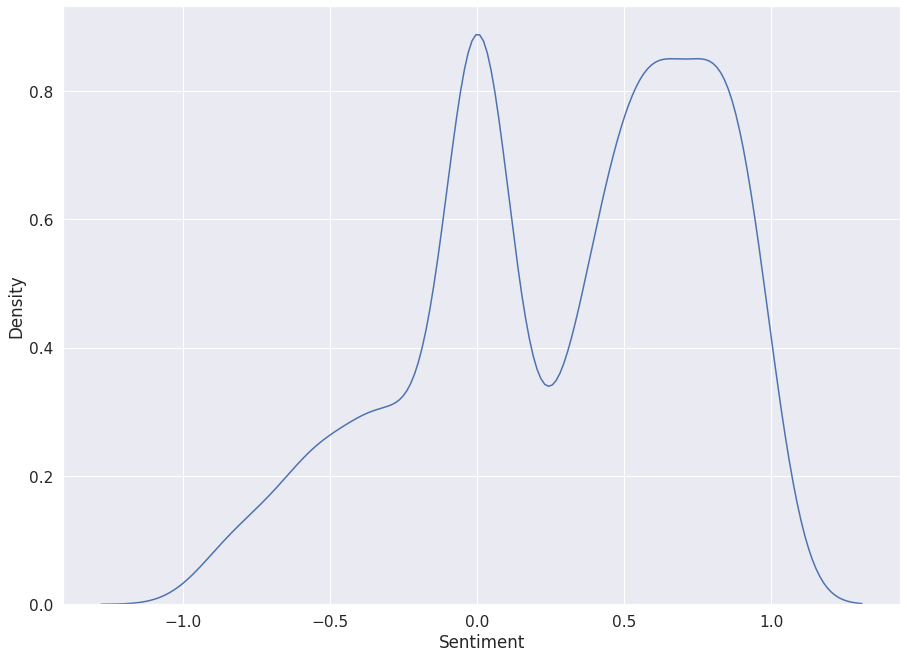

In [ ]:
plt.figure(figsize=(15,11))
sns.distplot(ndata4['Sentiment'], bins='auto', hist=False)
plt.xlabel('Sentiment')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


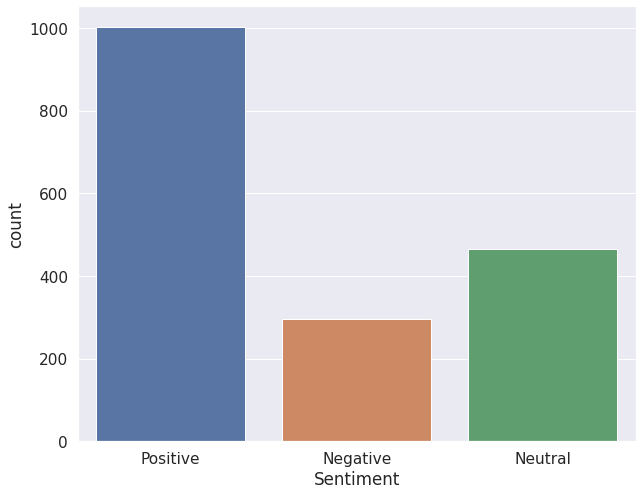

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(ndata4['Summary_Sentiment'])
plt.xlabel('Sentiment')
plt.show();

In [ ]:
ndata5 = ndata.copy()

ndata5['Negative'] = vader_neg
ndata5['Neutral'] = vader_neu
ndata5['Positive'] = vader_pos
ndata5['Compound'] = vader_com

ndata5.head()

,Post_id,Post,Date,Time,Negative,Neutral,Positive,Compound
0,0,@therecount @BioAnnie2 This picture is Amazing...,2021-08-29,23:34:23,0.000,0.716,0.284,0.8834
1,1,"bought a gift for northie, all she want is nik...",2021-08-29,23:07:16,0.000,0.756,0.244,0.4939
2,2,Sizes Added: Nike Air Force 1 Cork Happy Pinea...,2021-08-29,23:05:06,0.000,0.778,0.222,0.5719
3,3,@KeeganHall @Jumpman23 @Nike @nikebasketball @...,2021-08-29,23:05:04,0.000,0.689,0.311,0.7767
4,4,@hamlyn_chris Itâ€™s tough to say really until...,2021-08-29,22:47:04,0.184,0.769,0.047,-0.7425


In [ ]:
sum_sent = []
for score in ndata5['Compound']:
  if score < -0.2:
    sum_sent.append('Negative')
  elif score > 0.2:
    sum_sent.append('Positive')
  else:
    sum_sent.append('Neutral')

In [ ]:
ndata5['Summary_Sentiment'] = sum_sent

ndata5

,Post_id,Post,Date,Time,Negative,Neutral,Positive,Compound,Summary_Sentiment
0,0,@therecount @BioAnnie2 This picture is Amazing...,2021-08-29,23:34:23,0.000,0.716,0.284,0.8834,Positive
1,1,"bought a gift for northie, all she want is nik...",2021-08-29,23:07:16,0.000,0.756,0.244,0.4939,Positive
2,2,Sizes Added: Nike Air Force 1 Cork Happy Pinea...,2021-08-29,23:05:06,0.000,0.778,0.222,0.5719,Positive
3,3,@KeeganHall @Jumpman23 @Nike @nikebasketball @...,2021-08-29,23:05:04,0.000,0.689,0.311,0.7767,Positive
4,4,@hamlyn_chris Itâ€™s tough to say really until...,2021-08-29,22:47:04,0.184,0.769,0.047,-0.7425,Negative
...,...,...,...,...,...,...,...,...,...
1757,16815,@DaReturns @essjayy2345 And who are you direct...,2021-09-03,22:14:22,0.111,0.790,0.099,0.0890,Neutral
1758,16816,The green glow/coconut milk Happy Pineapple Ni...,2021-09-03,22:10:03,0.000,0.712,0.288,0.8986,Positive
1759,16817,Donâ€™t forget also that his name is also a br...,2021-09-03,22:09:51,0.050,0.824,0.125,0.7096,Positive
1760,16902,@bindelj @blablafishcakes /of those prey to th...,2021-09-03,22:10:30,0.271,0.651,0.078,-0.8860,Negative


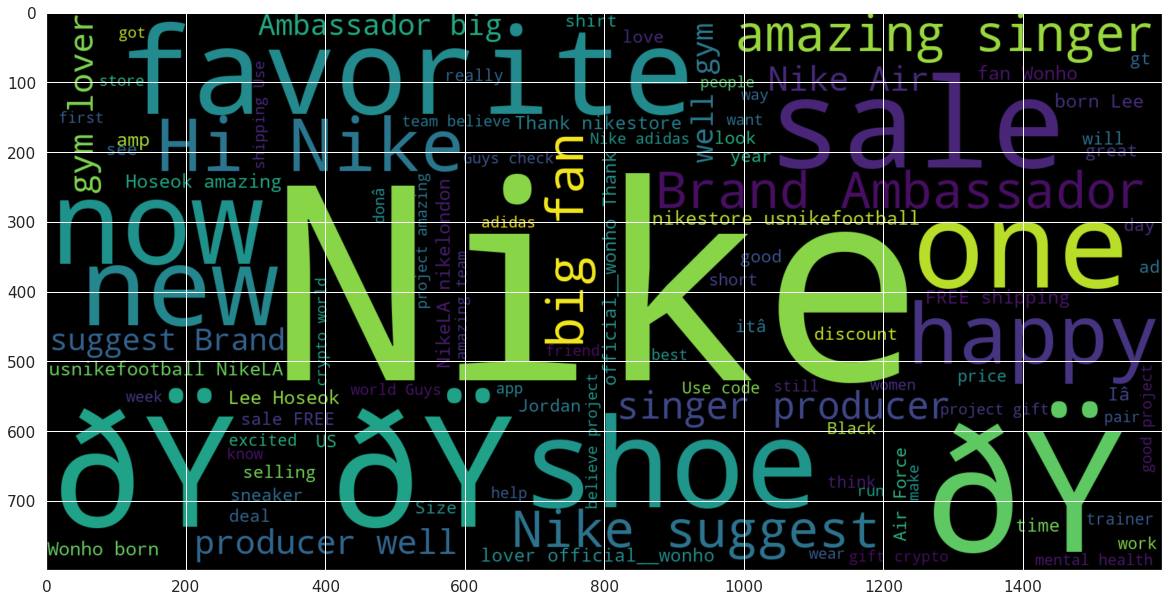

In [ ]:
from wordcloud import WordCloud

# Top 100 words for positive posts:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(ndata5[ndata4.Summary_Sentiment == 'Positive'].Post))
plt.imshow(wc , interpolation = 'bilinear')

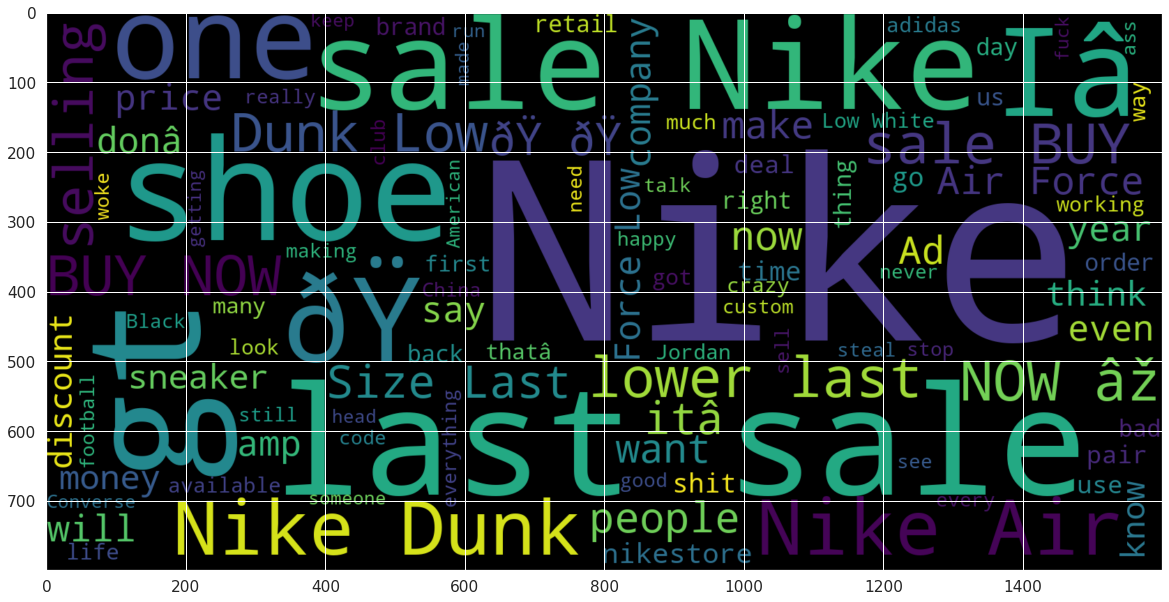

In [ ]:
# Top 100 words for negative posts:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(ndata5[ndata4.Summary_Sentiment == 'Negative'].Post))
plt.imshow(wc , interpolation = 'bilinear')

# Business Insights